# Practice Session 03: Find near-duplicates using shingling

Author: <font color="blue">Nil Tomàs Plans</font>

E-mail: <font color="blue">nil.tomas01@estudiant.upf.edu</font>

Date: <font color="blue">05/10/2024</font>

<font size="+2" color="blue">Additional results: various ngram sizes</font>

In [38]:
import io
import json
import gzip
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

import datetime

In [39]:
# KEEP AS-IS

# Input file
INPUT_FILENAME = "CovidLockdownCatalonia.json.gz"

# Array for storing messages
messages = []

# IMPORTANT:
# 1. Set this to 1000 during development
# 2. Set this to 10000 once you have completed the development, and answer part 5 with 10000
# 3. Set this back to 1000 for delivering your code
MAX_MESSAGES = 1000

with gzip.open(INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    
    messages_read = 0
    for line in input_file:
            
        # Read message
        tweet = json.loads(line)

        # Keep only messages in Catalan
        if tweet["lang"] == "ca":
            
            messages_read += 1
            
            if messages_read <= MAX_MESSAGES:
                author = tweet["user"]["screen_name"]
                message = tweet["full_text"]
                messages.append(message)

print("Read %d documents" % len(messages))

Read 1000 documents


# 1. Auxiliary functions

<font size="+1" color="red">Replace this cell with your code for function "jaccard_similarity"</font>

In [40]:
#code for function "jaccard_similarity"
def jaccard_similarity(list1, list2):
    set1=set(list1)
    set2=set(list2)
    
    union_s1s2=set1.union(set2)
    intersection_s1s2=set1.intersection(set2)
    
    if(len(union_s1s2) !=0):
        compute=len(intersection_s1s2)/len(union_s1s2)
    else:
        return 0
    return(compute)


<font size="+1" color="red">Replace this cell with your code testing "jaccard_similarity"</font>

In [41]:
#code testing "jaccard_similarity"

array1=[1,2,3,4,5]
array2=[1,2,1,8,5]
jaccard_similarity_=jaccard_similarity(array1,array2)
print("JS case 1: ",jaccard_similarity_,"expected: 0.5")

array1=[2,2,3,4]
array2=[2,3,4,5]
jaccard_similarity_=jaccard_similarity(array1,array2)
print("JS case 2: ",jaccard_similarity_," expected: 0.75")

array1=[1,2]
array2=[3,4]
jaccard_similarity_=jaccard_similarity(array1,array2)
print("JS case 3: ",jaccard_similarity_," expected: 0.0")

array1=[3,2]
array2=[3,2]
jaccard_similarity_=jaccard_similarity(array1,array2)
print("JS case 4: ",jaccard_similarity_," expected: 1.0")


JS case 1:  0.5 expected: 0.5
JS case 2:  0.75  expected: 0.75
JS case 3:  0.0  expected: 0.0
JS case 4:  1.0  expected: 1.0


<font size="+1" color="red">Replace this cell with your code for function "clean"</font>

In [42]:
#code for function "clean"

def clean(text):

    text=re.sub(r" RT"," ",text)#To search for RT prefixes, i search for a space before and after the RT, this way it will
    #only remove prefixes, not RT inside words
    text = re.sub(r"^RT\s*", " ", text)#delete if RT is at the beginning
 
    #converting text to lower case
    text=text.lower()
    
    #romanizing text
    roman_letters = {"ñ": "n","Ñ": "n",
                    "à": "a", "á":"a",
                    "è": "e", "é": "e",
                    "í": "i",
                    "ò": "o","ó": "o",
                    "ú": "u",
                    "ç": "c","l·l": "ll"}
    
    for i, j in roman_letters.items():
        text=re.sub(i,j,text)

    
    # remove urls both http and https
    text = re.sub(r"http[s]?\S+", "", text)
    
    #removing spaces at the beginning and at the end
    text=text.strip()
    
    #Removing anything that remains that is not a letter or digit
    text=re.sub(r"[^a-zA-Z0-9\s]","",text)
    
    #Changing double spaces or more to single space
    text = re.sub(r'\s+', ' ', text)
    
    return text
    

In [43]:
t1="RT A RT vegades RTprimerpre1fix  Ññàáèéíòóúçl·l  i https://google.com o http//:.aixo_es_una_web.com  i  ?'' AZ?az 123456789 ¿? RTprefixaborrarRT o rtprefixnoborrar! "

tresult=clean(t1)
print(tresult)

a vegades primerpre1fix nnaaeeiooucll i o i azaz 123456789 prefixaborrarrt o rtprefixnoborrar


<font size="+1" color="red">Replace this cell with your code testing function "clean"</font>

# 2. Implement an n-gram extractor

<font size="+1" color="red">Replace this cell with your code implementing function "ngrams(text,size)"</font>

In [44]:
#code implementing function "ngrams(text,size)

MIN_TOKEN_LENGTH = 3#global variable that tells us the minimum length that has to have the words in order to be included in ngrams

def ngrams(text, size):
    # Clean the text and split it into tokens
    tokens = clean(text).split()
    ngrams = []

    
    #First of all, I filter the words that have length >= to MIN_TOKEN_LENGTH
    #in tokens, we have all words already cleaned with the function that we did before
    #Those that the length is below the minimum length, we do not consider them
    valid_words=[]
    for token in tokens:
        if (len(token)>= MIN_TOKEN_LENGTH):
            valid_words.append(token)

    
    # Loop to create all subsequences
    for i in range(len(valid_words) - size + 1):
        current_words = valid_words[i:i + size]  # we extract the words needed, depending on the "size" of each sequence
        word_to_append = ' '.join(current_words)  # we need to join the current words with a space between them, 
        #otherwise, they will be separated by a comma
        ngrams.append(word_to_append) 
        
    return ngrams

<font size="+1" color="red">Replace this cell with your code testing function "ngrams"</font>

In [45]:
#code testing function "ngrams"
print(messages[990])
print(ngrams(messages[990], 3))

Clam per la suspensió dels desnonaments en plena crisi pel coronavirus https://t.co/0g1AtSELwl
['clam per suspensio', 'per suspensio dels', 'suspensio dels desnonaments', 'dels desnonaments plena', 'desnonaments plena crisi', 'plena crisi pel', 'crisi pel coronavirus']


# 3. Estimation of brute force all-pairs method

In [46]:
# LEAVE AS-IS

def time_brute_force_similarities(messages, limit, ngram_size):
    if limit > len(messages):
        raise ValueError("Limit should be less than or equal than the number of messages")
        
    # Start a timer
    start = timer()

    # Iterate through document identifiers
    for docid1 in range(np.min([len(messages), limit])):

        # Clean document 1 and extract ngrams
        doc1 = clean(messages[docid1])
        ngrams1 = ngrams(doc1, ngram_size)

        # Iterate through document identifiers larger than doc2
        for docid2 in range(docid1+1, np.min([len(messages), limit])):
                         
            # Clean document 2 and extract ngrams
            doc2 = clean(messages[docid2])
            ngrams2 = ngrams(doc2, ngram_size)

            # Compute similarity
            similarity = jaccard_similarity(ngrams1, ngrams2)

    end = timer()
    return(end - start)

<font size="+1" color="red">Replace this cell with your code for generating the requested plot. Remember to add a title and label for the x and y axis.</font>

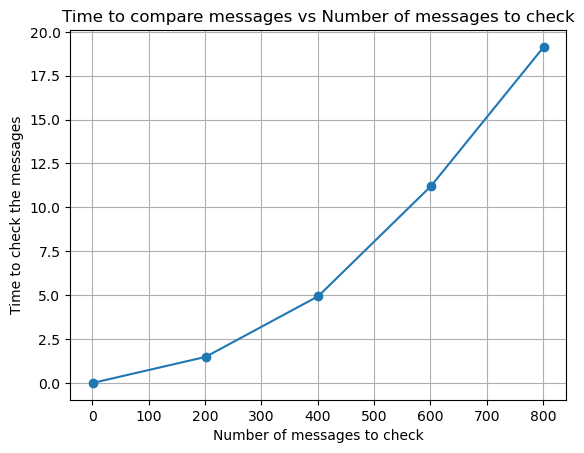

In [47]:
#code for generating the requested plot. 
#Remember to add a title and label for the x and y axis.


stored_times = []
message_intervals = range(1, 1001, 200)#I use the function range to increment the messages from 200 to 200

for limit in message_intervals:#for each iteration, we compute the time for each interval
    time = time_brute_force_similarities(messages, limit, ngram_size=5)
    stored_times.append(time)

#Plotting data
plt.plot(message_intervals, stored_times,marker='o')
plt.xlabel("Number of messages to check")
plt.ylabel("Time to check the messages")
plt.title("Time to compare messages vs Number of messages to check")
plt.grid(True)
plt.show()

<font size="+1" color="red">Replace this cell with (1) a brief commmentary about what you see in this plot, and (2) your estimate for how long it would take to run the brute force similarity computations for the entire input matrix. Express your estimation in hours, minutes, and seconds. Justify precisely your calculations.</font>

<font size="+1" color="blue">(1) The plot shows the relationship between the number of messages compared and the time it takes to perform brute-force similarity computations.Additionally, I can observe that the data follows a quadriatic distribution, and each 200 messages, there's a change on the slope, due to that it's the intervals that we've defined in "message_intervals"</font>

<font size="+1" color="blue">(2) We can see that to check 800 messages takes approximately 25 seconds. Then if the document contains 35,500 messages (as we observe on the first lines of this document). As its a brute-force function, it will do n*(n-1)/2 comparisons. 
if for n=800 does 800*799/2 =319600 comparisons, then for n=35500 it will do: 35500*(35499)/2 =630737250 comparisons. Then if for 319600 comparisons takes 25 seconds, for 630737250 will take: 25*630737250/319600 = 49338s= 13 hours and 42 minutes approximately.
</font>

# 4. Computing the doc-ngram matrix

## 4.1 Create list of all ngrams

<font size="+1" color="red">Replace this cell with your code for creating the ngram_to_index dictionary.</font>

In [48]:
#code for creating the ngram_to_index dictionary.
NGRAM_SIZE = 4

ngram_to_index = {}
index_to_ngram = {}
next_index = 0

for message in messages:
    all_ngrams = ngrams(message, NGRAM_SIZE)
    for ngram in all_ngrams: #for each word in each sequence of all_ngrams, we search if the word is not stored in the dictionary
        #and we add it and update the next_index
        # YOUR CODE HERE
        if ngram not in ngram_to_index:
            ngram_to_index[ngram] = next_index
            index_to_ngram[next_index] = ngram
            next_index += 1                       
num_distinct_ngrams = next_index

print("There are %d distinct ngrams in the %d documents" % (num_distinct_ngrams, len(messages)))

There are 8070 distinct ngrams in the 1000 documents


<font size="+1" color="red">Replace this cell with your code for testing the ngram_to_index structure.</font>

In [49]:
#code for testing the ngram_to_index structure.

#definition of strings
str1="els restaurants han de reduir"
str2="supera fins tot mateix"

#I pass the string through the function ngrams()
ngrams_1 = ngrams(str1, NGRAM_SIZE)
ngrams_2 = ngrams(str2, NGRAM_SIZE)
#as NGRAM_SIZE=4, then it takes all the entire string


#FIRST STRING
for ngram in ngrams_1:
    if ngram in ngram_to_index:#I check if n-gram exists in the dictionary
        index = ngram_to_index[ngram]#save the index and print the results below
        print(f"N-gram 1: '{ngram}', index: {index}")
        print(f"Check indexs: '{index_to_ngram[index]}'")
    else:
        print(f"N-gram 1: '{ngram}' not found")

print()

#SECOND STRING
for ngram in ngrams_2:
    if ngram in ngram_to_index:
        index = ngram_to_index[ngram]
        print(f"N-gram 2: '{ngram}', index: {index}")
        print(f"Check indexs: '{index_to_ngram[index]}'")
    else:
        print(f"N-gram 2: '{ngram}' not found")
        


N-gram 1: 'els restaurants han reduir', index: 14
Check indexs: 'els restaurants han reduir'

N-gram 2: 'supera fins tot mateix', index: 36
Check indexs: 'supera fins tot mateix'


## 4.2 Create table ngrams x documents

In [50]:
# LEAVE AS-IS

# Create dense matrix in which every cell contains the value "False"
M_ngram_doc = np.full((num_distinct_ngrams, len(messages)), False)

# Print the number of rows and columns of this matrix
# numpy.matrix.shape is a tuple, shape[0] is the number of rows, shape[1] the number of columns
print("Matrix dimensions: %d rows (distinct shingles) x %d columns (distinct documents)" % M_ngram_doc.shape)

Matrix dimensions: 8070 rows (distinct shingles) x 1000 columns (distinct documents)


<font size="+1" color="red">Replace this cell with your code for filling the M_ngram_doc matrix.</font>

In [51]:
for docid in range(len(messages)):
    message = messages[docid]
    all_ngrams = ngrams(message, NGRAM_SIZE)
    for ngram in all_ngrams:
        if ngram in ngram_to_index:  # First we should check if the ngram exists in the dictionary
            ngram_idx = ngram_to_index[ngram]#we get the index idx
            M_ngram_doc[ngram_idx][docid] = True #and update the M_ngram_doc matrix of the corresponding cell 
            #where ngram_idxx is the row and docid the column


<font size="+1" color="red">Replace this cell with your code for printing the density of the M_ngram_doc matrix as a percentage. Use 4 decimals.</font>

In [52]:
#code for printing the density of the M_ngram_doc matrix as a percentage. Use 4 decimals.
count_0 = np.sum(M_ngram_doc)#count number of 0's

total_cells = M_ngram_doc.shape[0] * M_ngram_doc.shape[1]

# we compute the density as a percentage
density= (count_0 / total_cells) * 100

# show the density as percentage with 4 decimals 
print(f"Density of 0's of M_ngram_doc  matrix: {density:.4f}%")

Density of 0's of M_ngram_doc  matrix: 0.1395%


<font size="+1" color="red">Replace this cell with your code for printing rows 9602 and 941 of the M_ngram_doc matrix.</font>

In [53]:
#code for printing columns 962 and 941 of the M_ngram_doc matrix.


# documents to check
docids = [962, 941]

# Iterate for each column (document)
for docid in docids:
    print(f"Positions of non-zeros in column of docid {docid} of M_ngram_doc")
    
    # I get the message, I clean it with the function done initially and print it
    message = messages[docid]
    
    cleaned_message = clean(message)
    print("Clean message:")
    print(cleaned_message)
    
    # getting the non-zero entries 
    non_zero_indices = np.where(M_ngram_doc[:, docid])[0]
    #adding the ngrams to the array to print it later
    nozero_ngrams=[]
    for index in non_zero_indices:
        nozero_ngrams.append(f"{index} ({index_to_ngram[index]})")
    
    
    print("Non-zeros in corresponding row:")
    print(nozero_ngrams)
    print() 

    #I've checked the code for column 16, as the example and it prints the same results

Positions of non-zeros in column of docid 962 of M_ngram_doc
Clean message:
el coronavirus tambe ensenya el cami independencia socialisme pasos catalans
Non-zeros in corresponding row:
['7873 (coronavirus tambe ensenya cami)', '7874 (tambe ensenya cami independencia)', '7875 (ensenya cami independencia socialisme)', '7876 (cami independencia socialisme pasos)', '7877 (independencia socialisme pasos catalans)']

Positions of non-zeros in column of docid 941 of M_ngram_doc
Clean message:
hospiolot usem de forma responsable els recursos sanitaris 061 urgencies per coronavirus i sanitaries 012 consultes general
Non-zeros in corresponding row:
['1065 (usem forma responsable els)', '1066 (forma responsable els recursos)', '1067 (responsable els recursos sanitaris)', '1068 (els recursos sanitaris 061)', '1069 (recursos sanitaris 061 urgencies)', '1070 (sanitaris 061 urgencies per)', '1071 (061 urgencies per coronavirus)', '1072 (urgencies per coronavirus sanitaries)', '1073 (per coronavirus s

# 5. Implement a permutation generator

<font size="+1" color="red">Replace this cell with your code for "random_permutation"</font>

In [54]:
#code for "random_permutation"
def random_permutation(k):
    llista=list(range(k))
    random.shuffle(llista)
    return llista


In [55]:
# LEAVE AS-IS

# Permute a list according to a permutation
def permuter(original_list, permutation):
    permuted_list = []
    for index in permutation:
        permuted_list.append(original_list[index])
    return permuted_list

# Code for testing permutations
original_list_1 = ["1 (test1)", "2 (test2)", "3 (test3)", "4 (test4)", "5 (test5)"]
original_list_2 = ["1 (alpha)", "2 (gamma)", "3 (beta)", "4 (delta)", "5 (epsilon)"]

print("Test one permutation:")
permutation_1 = random_permutation(5)
print(permuter(original_list_1, permutation_1))
print(permuter(original_list_2, permutation_1))

print()

print("Test another permutation")
permutation_2 = random_permutation(5)
print(permuter(original_list_1, permutation_2))
print(permuter(original_list_2, permutation_2))

Test one permutation:
['3 (test3)', '2 (test2)', '4 (test4)', '1 (test1)', '5 (test5)']
['3 (beta)', '2 (gamma)', '4 (delta)', '1 (alpha)', '5 (epsilon)']

Test another permutation
['3 (test3)', '2 (test2)', '1 (test1)', '4 (test4)', '5 (test5)']
['3 (beta)', '2 (gamma)', '1 (alpha)', '4 (delta)', '5 (epsilon)']


# 6. Compute the signature of each document

In [56]:
# Leave this code as-is

NUM_PERMUTATIONS = 5

permutations = []

# Create the permutations
for i in range(NUM_PERMUTATIONS):
    permutation = random_permutation(num_distinct_ngrams)
    permutations.append(random_permutation(num_distinct_ngrams))
    
# Visualize the permutations by printing their first 4 elements
for i in range(len(permutations)):
    permutation = permutations[i]
    print("Permutation %d: %d, %d, %d, %d, ..." % (i,
                permutation[0], permutation[1], permutation[2], permutation[3] ))

Permutation 0: 2102, 3418, 390, 5275, ...
Permutation 1: 5957, 6816, 4470, 3817, ...
Permutation 2: 5152, 3030, 6392, 6630, ...
Permutation 3: 6788, 6746, 2142, 2565, ...
Permutation 4: 4309, 5717, 2673, 270, ...


In [57]:
# LEAVE AS-IS

# Find the first ngram in a document, according to a permutation
def find_first_one(docid, permutation):
    for shingle_id in permutation:
        if M_ngram_doc[shingle_id, docid] == True:
            return shingle_id
    return -1

<font size="+1" color="red">Replace this cell with your code for creating M_signature_doc</font>

In [58]:
M_signature_doc = np.full((NUM_PERMUTATIONS, len(messages)), np.nan)

# Create permutations
for permutation_num in range(NUM_PERMUTATIONS):
    print("Creating signatures for permutation %d/%d" % (permutation_num+1, NUM_PERMUTATIONS))
    permutation = permutations[permutation_num]
    
    for docid in range(len(messages)):
        if docid % 1000 == 0:
            print("- Scanning document %d of %d" % (docid, len(messages)))
        #first we find the first ngram in a column according to a permutation
        find_first_ngram = find_first_one(docid, permutation)
        # and we update the matrix M_sgnature_doc that we've defined previously with NaN values
        M_signature_doc[permutation_num, docid] = find_first_ngram


Creating signatures for permutation 1/5
- Scanning document 0 of 1000
Creating signatures for permutation 2/5
- Scanning document 0 of 1000
Creating signatures for permutation 3/5
- Scanning document 0 of 1000
Creating signatures for permutation 4/5
- Scanning document 0 of 1000
Creating signatures for permutation 5/5
- Scanning document 0 of 1000


In [59]:
# Leave this code as-is

def extract_ngrams(docid):
    return [x for x in range(num_distinct_ngrams) if M_ngram_doc[x, docid] == True]

def extract_signature(docid):
    return [M_signature_doc[x, docid] for x in range(NUM_PERMUTATIONS)]

def print_sig(messages, M_ngram_doc, M_signature_doc, i):
    print("Document #%d" % i)
    print("Message       : %s" % messages[i])
    print("Clean message : %s" % clean(messages[i]))
    print("Ngrams        : %s" % extract_ngrams(i))
    print("Signature     : %s" % extract_signature(i))

# Print two messages and their signatures

print_sig(messages, M_ngram_doc, M_signature_doc, 21 )
print()
print_sig(messages, M_ngram_doc, M_signature_doc, 24 )

Document #21
Message       : El problema és económic... ja no és només que primi lo económic a lo personal, és que fins i tot en això el @govern s'equivoca, doncs al final la factura que s'haurà de pagar serà més gran.... ja és més gran del que hauria sigut de fer les coses bé i a temps. https://t.co/jFXHAMZHO0
Clean message : el problema es economic ja no es nomes que primi lo economic a lo personal es que fins i tot en aixo el govern sequivoca doncs al final la factura que shaura de pagar sera mes gran ja es mes gran del que hauria sigut de fer les coses be i a temps
Ngrams        : [231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259]
Signature     : [231.0, 253.0, 246.0, 254.0, 233.0]

Document #24
Message       : RT @QuimTorraiPla: Seguiu les recomanacions: eviteu qualsevol desplaçament al màxim
Clean message : quimtorraipla seguiu les recomanacions eviteu qualsevol desplacament al maxim
Ng

# 5. Compare all pairs of signatures

<font size="+1" color="red">Replace this cell with your code for comparing all signatures; print all documents that have at least X signature matches, considering both full matches and partial matches. X should be 0.5% of the  number of documents.</font>

In [60]:
#code for comparing all signatures; print all documents 
#that have at least X signature matches,considering both full matches 
#and partial matches. X should be 0.5% of the number of documents.


is_possible_duplicate = {}
threshold=0.005*len(messages)#DEFINITION OF THRESHOLD ACCORDING TO THE 5%

# Iterate through all documents
for docid1 in range(len(messages)):

     # Do not examine again a document that is a possible duplicate
    if docid1 not in is_possible_duplicate:

        # Counters for full and partial signature matches
        count_sig_full_matches = 0
        count_sig_partial_matches = 0

        # Extract the signature of the doc1
        signature1 = extract_signature(docid1)
      
        if docid1 % 500 == 0:
            print("%d/%d documents scanned" % (docid1, len(messages)))

        # Iterate through documents with docid larger than doc1
        for docid2 in range(docid1+1, len(messages)):

            # If this has not already been marked as duplicate of another document
            if docid2 not in is_possible_duplicate:

                # Extract signature of doc2
                signature2 = extract_signature(docid2)
                # - Increase count_sig_full_matches and count_sig_partial_matches as needed
                # - Include docid2 in is_possible_duplicate if needed
                
                #first I compute the similarity with the function created at the beggining of the lab, jaccard_similarity                
                similarity=jaccard_similarity(signature1,signature2)
                
                #and depending if it's a full_match or partial, we update each counter respectively
                if similarity == 1.0:
                    count_sig_full_matches += 1
                    is_possible_duplicate[docid2] = True  
                elif 0.2 < similarity < 1.0:
                    count_sig_partial_matches += 1
                    is_possible_duplicate[docid2] = True  

        # Check if the number of matches exceeds the threshold
        # - If the number of partial matches plus full matches exceeds a threshold
        #   print the document doc1 and indicate how many matches of each type it has
        total_matches = count_sig_full_matches + count_sig_partial_matches
        #threshold is defined at the beggining at teh top of this code
        if total_matches >= threshold:
            print(f"Document {docid1} has {count_sig_full_matches} full matches and "
                  f"{count_sig_partial_matches} partial matches.")
        

0/1000 documents scanned
Document 2 has 5 full matches and 0 partial matches.
Document 16 has 6 full matches and 0 partial matches.
Document 22 has 7 full matches and 0 partial matches.
Document 32 has 7 full matches and 4 partial matches.
Document 42 has 2 full matches and 6 partial matches.
Document 53 has 5 full matches and 0 partial matches.
Document 83 has 15 full matches and 0 partial matches.
Document 95 has 9 full matches and 0 partial matches.
Document 104 has 7 full matches and 0 partial matches.
Document 166 has 13 full matches and 0 partial matches.
Document 175 has 6 full matches and 0 partial matches.
Document 212 has 5 full matches and 0 partial matches.
Document 222 has 5 full matches and 0 partial matches.
Document 249 has 8 full matches and 0 partial matches.
Document 276 has 4 full matches and 1 partial matches.
Document 328 has 7 full matches and 0 partial matches.
Document 385 has 7 full matches and 2 partial matches.
500/1000 documents scanned


<font size="+1" color="red">Replace this cell with a brief commentary, based on the results above, about one tweet that has a substantial number of complete matches, but few partial matches. Include the full text of the original tweet. Comment on why you believe this tweet is not being changed much when copied or re-tweeted.</font>

In [67]:
#print(messages[5077])
#I added this line commented because otherwise when I re runed the code, with MAX_MESSAGES =1000, it appeared an error. 



<font size="+1" color="blue">After observing the results of the documents with the most full matches (document 5077 with 176 full matches) it appears that it has 176 full matches because it is not modified and it's a part of a FAQs section, which are commonly frequented by users. Concluding that it makes sense that it has 176 full matches </font>



<font size="+1" color="red">Replace this cell with a brief commentary, based on the results above, about one tweet that has a substantial number of partial matches, but fewer complete matches. Include the full text of the original tweet and one near duplicate (that cannot be identical to the original tweet).</font>

In [63]:
print("original tweet: \n",messages[42])

print("\nnear duplicate tweet: ")
print("RT @VilaWeb: Els @mossos diuen que seria més fàcil confinar el Principat que múltiples ciutats a la vegada")


original tweet: 
 RT @VilaWeb: Els @mossos diuen que és més senzill confinar el Principat que diverses ciutats a la vegada https://t.co/piyLz82e9d

near duplicate tweet: 
RT @VilaWeb: Els @mossos diuen que seria més fàcil confinar el Principat que múltiples ciutats a la vegada


<font size="+1" color="blue">Observing a tweet that has a substantial number of partial matches, is document 42, with 31 partial matches and 21 full-matches. Because it has a major number of keywords that are commonly used and relevant in a lot of conversations. Resulting that people will retweet it and  modify it slightly.</font>

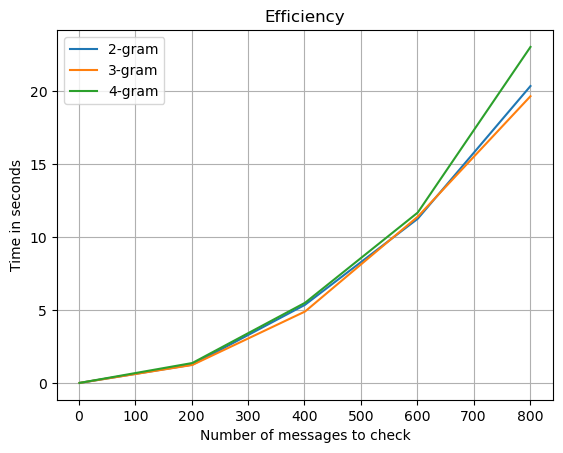

In [64]:
#compare what happens with 3 different ngram sizes (2-grams, 3-grams, 4-grams) in terms of the efficiency (speed) 
#and effectiveness (accuracy). You can include plots for efficiency, and examples for effectiveness.



message_intervals = range(1, 1001, 200)#I use the function range to increment the messages from 200 to 200


stored_times={}#dictionary to keep the values for each n-gram, because later we will want to compare and plot them
for i in range(2,5):
    stored_times[i]=[]
    for limit in message_intervals:#for each iteration, we compute the time for each interval
        time = time_brute_force_similarities(messages, limit,i)
        stored_times[i].append(time)#and add the time to dictionary

        
#Plot of efficiency for 2-gram, 3-gram, and 4-gram       
for i in range(2,5):
    plt.plot(message_intervals, stored_times[i], label=f"{i}-gram")

plt.xlabel("Number of messages to check")
plt.ylabel("Time in seconds")
plt.title("Efficiency")
plt.grid(True)
plt.legend()
plt.show()

    


<font size="+1" color="blue">After plotting the different n-gram where n is {2,3,4}, I observe that for 800 messages to check, the n-gram the **most efficient**, and then the one that takes less time is the 3-gram.
Concerning the **effectiveness**, the n-gram  effective will be the one in which the difference between the computed similarity and the expected similarity. We could compute it using the function of above jaccard_similarity</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>